# Machine Learning and Optimization

## Table Of Content

**1. Data Collection**

* Getting the data

**2. Descriptive Analysis**

* Data reading

* Data cleaning

* Mean and Mode

* Exploratory Data Analysis (EDA)

**3. Predictive Analysis**

* Feature engine

* Correlation

* Classification

**4. Clustering**

**5. Neural network**

**6. Optimization**

**Summary**

## 1. Data Collection

**This dataset is provided for this assessment where individual demographic data, including age, workclass, education, marital status, occupation, relationship, race, sex, capital gain, capital loss, hours worked per week, and country of origin, are included in the Census dataset for this analysis.**

## 2. Descriptive analysis

### Data reading

In [1]:
# Importing the libraries

# For analysing data
import pandas as pd
# For visualising insight of data
import seaborn as sns
# For creating diagram
import matplotlib.pyplot as plt
# For the numerical values
import numpy as np
# For train test splitting and grid search for optimization 
from sklearn.model_selection import train_test_split, GridSearchCV
# For preprocessing the data
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# For preprocessing the data
from sklearn.compose import ColumnTransformer
# For building pipeline
from sklearn.pipeline import Pipeline
# For building model
from sklearn.linear_model import LogisticRegression
# For building model
from sklearn.tree import DecisionTreeClassifier
# For building model
from sklearn.ensemble import RandomForestClassifier
# For building model
from sklearn.svm import SVC
# For clusering
from sklearn.cluster import KMeans
# For building model
from sklearn.neural_network import MLPClassifier
# For model evaluation
from sklearn.metrics import accuracy_score, classification_report, silhouette_score
# For splitting the data
from sklearn.model_selection import train_test_split
# For preprocessing the data
from sklearn.preprocessing import LabelEncoder, StandardScaler
# For building the model
from sklearn.ensemble import GradientBoostingClassifier
# For building model
from tensorflow.keras.models import Sequential
# For building the model
from tensorflow.keras.layers import Dense
# For building the model
from tensorflow.keras.utils import to_categorical
# For optimization
from sklearn.model_selection import GridSearchCV
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


In [2]:
# Defining and reading dataset
df = pd.read_csv("CensusDB.csv")

# Getting the first 5 rows
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K


**The pandas library pd.read_csv() function was used to read the data and then it was defined and .head() fuction was used to view the first five rows of the dataset.**

In [3]:
# Making a copy of the dataset
df_copy = df.copy()

# Getting the first 5 rows of the copied dataset
df_copy.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K


**A copy of the defined dataset was made and the first 5 rows of the dataset shows the values of the columns and the columns where some column values have "?" which shows the values are missing in the dataset.**

### Data Cleaning

In [4]:
# Checking for missing values in the data
df_copy.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

**The null values of the dataset is being checked and it's showing 0 for all the columns which means that there isn't null values in the dataset, all the values of the columns are there but some values that shows ? means that this is what was input for the unknown values in the dataset.**

In [5]:
# Replace `?` values with NaN
df_copy.replace('?', np.nan, inplace=True)

**The .replace() function was used to replace the ? in the dataset by nan.**

In [6]:
# Checking for missing values in the data
df_copy.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

**After replacing the ? values to nan in the dataset it is now showing the missing values in the dataset.**

In [7]:
# Impute missing values using the mode for categorical columns
categorical_columns = df_copy.select_dtypes(include=['object']).columns

**The categorical columns in the dataset is being gotten by using .select_dtypes() function to select only the categorical columns in the dataset.**

In [8]:
# Getting the numerical columns in the dataset.
numerical_columns = df_copy.select_dtypes(include=['float64', 'int64']).columns

**The numerical columns in the dataset is being gotten and defined by using the .select_dtypes() function to select the numerical columns present in the dataset.**

In [9]:
# Replacing the null values in the occupation column
for column in categorical_columns:
    mode_value = df_copy['occupation'].mode()[0]
    df_copy['occupation'].fillna(mode_value, inplace=True)

**The null values in the occupational column is being replaced or filled with the mode of the values in the column.**

In [10]:
# Replacing the null values in the workclass column
for column in categorical_columns:
    mode_value2 = df_copy['workclass'].mode()[0]
    df_copy['workclass'].fillna(mode_value, inplace=True)

**The null values in the workclass column values is being replaced or filled with the mode of the values in the column.**

In [11]:
# Replacing the null values in the native country column
for column in categorical_columns:
    mode_value3 = df_copy['native-country'].mode()[0]
    df_copy['native-country'].fillna(mode_value, inplace=True)

**The null values in the native country columns values is being replaced or filled with the mode of the values in the column.**

In [12]:
# Checking for missing values in the data
df_copy.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

**After replacing the null values in all columns in the dataset with the mode of the values the dataset now shows there is no more missing values in the dataset.**

### Mean and Mode

In [13]:
# Getting the description of the numerical columns
df_copy.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**The description of the dataset was gotten which shows the count of all the rows of the columns, the mean, the standard deviation, the minimun values till the maximum values in the dataset.**

### Exploratory Data Anaysis (EDA)

In [14]:
# Checking the rows and columns of the dataframe
print(f"Shape of the census data: {df_copy.shape}\n")

Shape of the census data: (32561, 14)



**The .shape function was used to get the total rows and column of the dataset which shows the dataset have 32561 rows and 14 columns present in the dataset.**

In [15]:
# Getting the information of the dataset
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


**The .info() function was used to get the information of the dataset which shows there is object and integer values present in the dataset.**

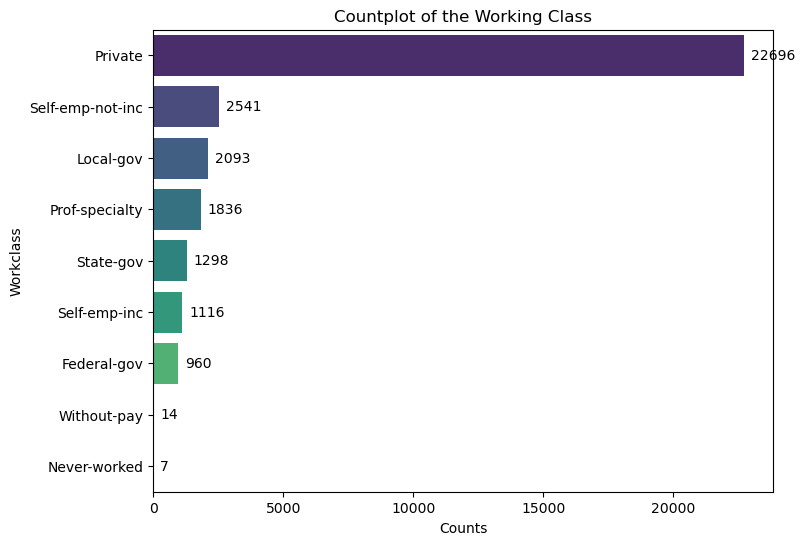

In [16]:
# Creating a countplot of the workclass column

# Setting the plot figure size
plt.figure(figsize=(8, 6)) 
# Count plot of the workclass column
ax = sns.countplot(data=df_copy, y='workclass', order=df_copy['workclass'].value_counts().index, palette='viridis')
# Giving the plot title
plt.title('Countplot of the Working Class')
# Labeling the x-axis
plt.xlabel('Counts')
# Labeling the y-axis
plt.ylabel('Workclass')
# Showing the value counts on top of the bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height()/2),
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')
# Displaying the plot
plt.show()


**The countplot of the workclass column shows the count of all the working class in the column with private workers are the most workers followed by the self employed and the never worked are the least.**

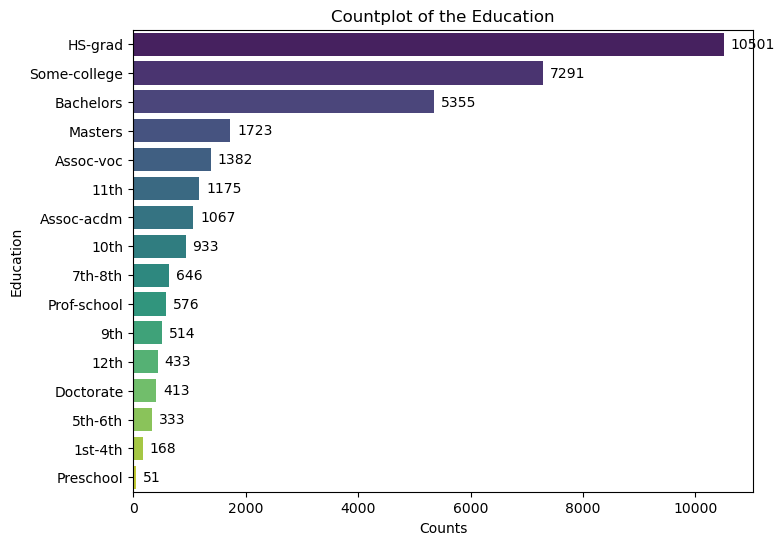

In [17]:
# Creating a countplot of the education column

# Setting the plot figure size
plt.figure(figsize=(8, 6)) 
# Count plot of the education column
ax = sns.countplot(data=df_copy, y='education', order=df_copy['education'].value_counts().index, palette='viridis')
# Giving the plot title
plt.title('Countplot of the Education')
# Labeling the x-axis
plt.xlabel('Counts')
# Labeling the y-axis
plt.ylabel('Education')
# Showing the value counts on top of the bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height()/2),
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')
# Displaying the plot
plt.show()


**The countplot of the education values was visualized and the HS-grad have the most education present in the dataset with pre school with the most least of the education present in the dataset.**

****

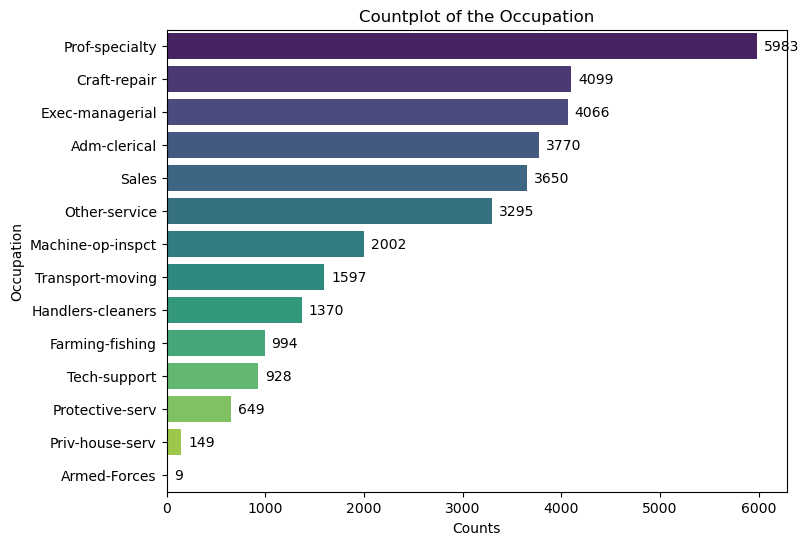

In [18]:
# Creating a countplot of the occupation column

# Setting the plot figure size
plt.figure(figsize=(8, 6)) 
# Count plot of the education column
ax = sns.countplot(data=df_copy, y='occupation', order=df_copy['occupation'].value_counts().index, palette='viridis')
# Giving the plot title
plt.title('Countplot of the Occupation')
# Labeling the x-axis
plt.xlabel('Counts')
# Labeling the y-axis
plt.ylabel('Occupation')
# Showing the value counts on top of the bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height()/2),
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')
# Displaying the plot
plt.show()


**The countplot of the occupation values present in the dataset was gotten and it shows prof-specialty having the most occupation present in the dataset and armed forces with the least occupation present in the dataset.**

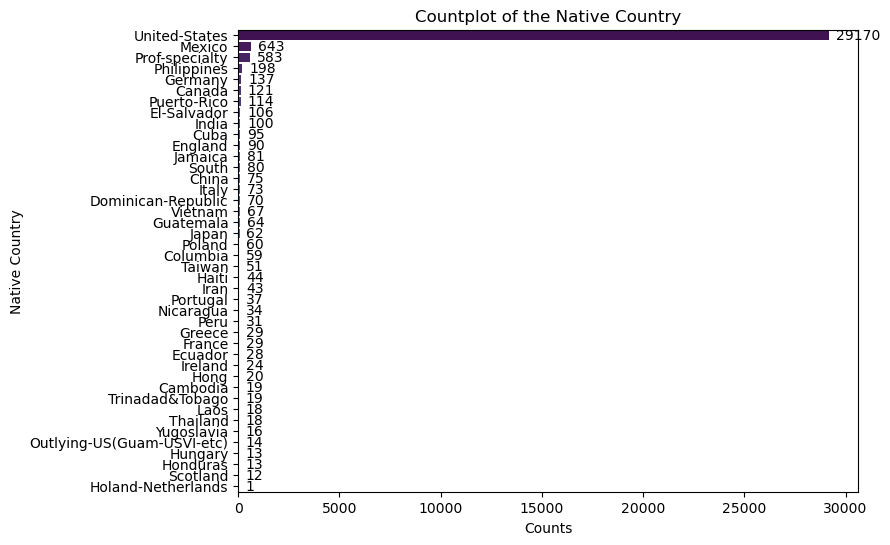

In [19]:
# Creating a countplot of the native country column

# Setting the plot figure size
plt.figure(figsize=(8, 6)) 
# Count plot of the native country column
ax = sns.countplot(data=df_copy, y='native-country', order=df_copy['native-country'].value_counts().index, palette='viridis')
# Giving the plot title
plt.title('Countplot of the Native Country')
# Labeling the x-axis
plt.xlabel('Counts')
# Labeling the y-axis
plt.ylabel('Native Country')
# Showing the value counts on top of the bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height()/2),
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')
# Displaying the plot
plt.show()


**The visualization of the native country count present in the dataset was gotten showing United States as the country with the most country in the dataset and Holand-Netherlands with the most least country present in the dataset.**

## 3. Predictive Analysis

### Feature engine

In [20]:
# Dropping columns
df_copy = df_copy.drop(columns=['fnlwgt', 'marital-status', 'relationship'])

**Some columns are drop in the dataset because they won't contribute to the aim of the analysis.**

In [21]:
# Separate features and target variable
Ind_var = df_copy.drop('income', axis=1)
Dep_var = df_copy['income']

**The independent and dependent variables in the dataset was defined.**

In [22]:
# Encode categorical variables
categorical_cols = Ind_var.select_dtypes(include=['object']).columns
label_encoders = {col: LabelEncoder().fit(Ind_var[col]) for col in categorical_cols}
for col in categorical_cols:
    Ind_var[col] = label_encoders[col].transform(Ind_var[col].astype(str))

**The categorical columns were gotten from the independent columns and they were encoded using a label encoder to transform the values of the categorical columns**

In [23]:
numerical_cols = Ind_var.select_dtypes(include=['int64', 'float64']).columns

**The numerical columns was gotten from the independent columns.**

In [24]:
# Encode target variable
Dep_var = LabelEncoder().fit_transform(Dep_var)

**Encoding the dependent variable using the label encoder.**

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Ind_var, Dep_var, test_size=0.2, random_state=42)

**Splitting the dataset into training and testing sets**

In [26]:
# Standardize numerical features

# Defining the standard scaler
scaler = StandardScaler()

# Scaling the training sets
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
# Scaling the testing sets
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

X_train.head(), y_train[:5]

(            age  workclass  education  education-num  occupation  sex  \
 5514  -0.921955          3         11      -0.421727           2    1   
 19777 -1.069150          3         11      -0.421727           7    0   
 10781 -0.185975          3          9       1.128259           0    0   
 32240 -1.216346          7         15      -0.034230           0    0   
 9876  -0.553965          1          9       1.128259           9    1   
 
        capital-gain  capital-loss  hours-per-week  native-country  
 5514      -0.147166      -0.21768       -1.258387              39  
 19777     -0.147166      -0.21768       -0.447517              39  
 10781     -0.147166      -0.21768       -0.042081              39  
 32240     -0.147166      -0.21768       -1.663822              39  
 9876      -0.147166      -0.21768       -0.042081              39  ,
 array([0, 0, 0, 0, 0]))

**The numerical values of the training and testing sets was scaled using standard scaler.**

### Correlation

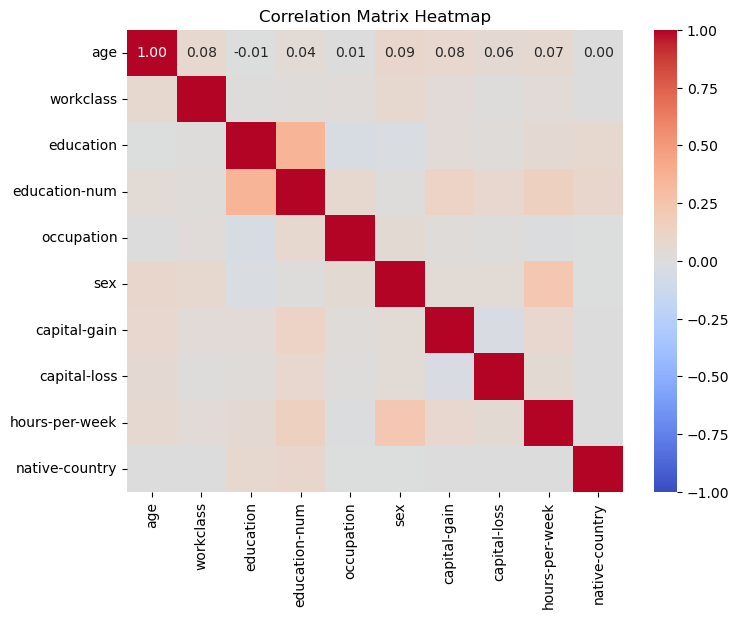

In [27]:
# Calculate the correlation matrix
correlation_matrix = X_train.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

**This dataset appears to have some features with weak correlation to each other, the education and education num show a strong positive correlation where the capital gain and capital loss show a weak correlation, hours per week also shows some correlation with age and education while other features show very weak or no significant correlation.**

## Classification

In [28]:
# Defining the model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

**An instance of the logistic regression algorithm was created and assigned to a variable where the parameter is set to 42 to ensure reproducibility of the result.**

In [29]:
# Fitting the model
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

**The logistic regression model is being trained on the training data where the fit method takes in the feature matrix and target vector for the training data.**

In [30]:
# Making prediction
logistic_pred = logistic_model.predict(X_test)

**The predict method is being used to make predictions on the test data where the predict method takes in the feature matrix and outputs the predicted labels and then the predictions are stored in a variable.**

In [31]:
# Model accuracy score
logistic_accuracy = accuracy_score(y_test, logistic_pred)

logistic_accuracy

0.8217411331183786

**The accuracy_score function is being used to evaluate the logistic regression model. The accuracy_score method calculates the accuracy of the model's prediction which takes in the true label for the test data and the predicted labels where the accuracy score of 82.17% is the proportion of the correct predictions out of the total number of predictions.**

In [32]:
# Model classification report
logistic_report = classification_report(y_test, logistic_pred)

logistic_report

'              precision    recall  f1-score   support\n\n           0       0.84      0.94      0.89      4976\n           1       0.70      0.43      0.53      1537\n\n    accuracy                           0.82      6513\n   macro avg       0.77      0.69      0.71      6513\nweighted avg       0.81      0.82      0.81      6513\n'

**The classification_report function is being used to evaluate the logistic regression model. The classification_report generates a detailed report of the model where the function takes in the true label for the test data and the predicted labels then the metrics scores are obtained.**

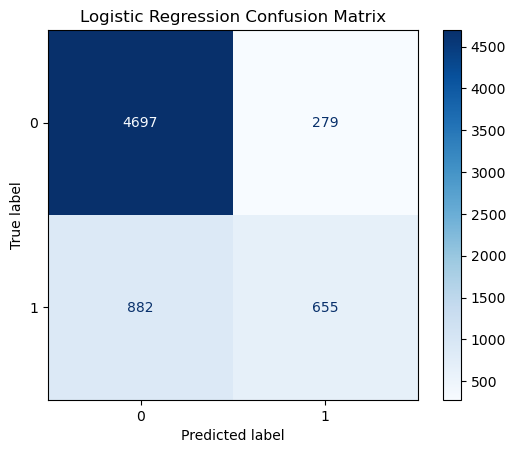

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create confusion matrix for Logistic Regression
cm_logistic = confusion_matrix(y_test, logistic_pred)
disp_logistic = ConfusionMatrixDisplay(confusion_matrix=cm_logistic)
disp_logistic.plot(cmap=plt.cm.Blues)
plt.title('Logistic Regression Confusion Matrix')
plt.show()


**The confusion matrix for the logistic regression model shows the model correctly predicted (true negative) 4697 individuals earning less than 50,000 annually, incorrectly predicted (false positive) 279 individuals earning more than 50,000 annually when they actually earn less, incorrectly predicted (false negative) 882 individuals earning less than 50,000 annually when they earn more, and correctly predicted (true positive) 655 individuals earning more than 50,000 annually.**

In [34]:
# Defining the model
decision_tree_model = DecisionTreeClassifier(random_state=42)

**An instance of the decision tree algorithm was created and assigned to a variable where the parameter is set to 42 to ensure reproducibility of the result.**

In [35]:
# Fitting the model
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**The decision tree model is being trained on the training data where the fit method takes in the feature matrix and target vector for the training data.**

In [36]:
# Model prediction
decision_tree_pred = decision_tree_model.predict(X_test)

**The predict method is being used to make predictions on the test data where the predict method takes in the feature matrix and outputs the predicted labels and then the predictions are stored in a variable.**

In [37]:
# Model accuracy
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)

decision_tree_accuracy

0.7977890373099954

**The accuracy_score function is being used to evaluate the decision tree model. The accuracy_score method calculates the accuracy of the model's prediction which takes in the true label for the test data and the predicted labels where the accuracy score of 79.77% is the proportion of the correct predictions out of the total number of predictions.**

In [38]:
# Model classification report
decision_tree_report = classification_report(y_test, decision_tree_pred)

decision_tree_report

'              precision    recall  f1-score   support\n\n           0       0.86      0.88      0.87      4976\n           1       0.58      0.54      0.56      1537\n\n    accuracy                           0.80      6513\n   macro avg       0.72      0.71      0.71      6513\nweighted avg       0.79      0.80      0.80      6513\n'

**The classification_report function is being used to evaluate the decision tree model. The classification_report generates a detailed report of the model where the function takes in the true label for the test data and the predicted labels then the metrics scores are obtained.**

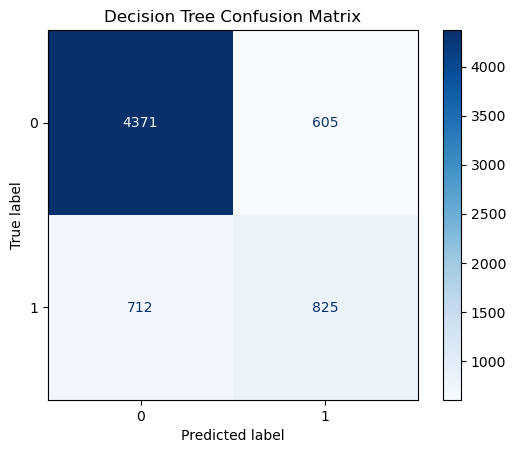

In [39]:
# Creating confusion matrix for the Decision Tree
cm_dec_tree = confusion_matrix(y_test, decision_tree_pred)
disp_dec_tree = ConfusionMatrixDisplay(confusion_matrix=cm_dec_tree)
disp_dec_tree.plot(cmap=plt.cm.Blues)
plt.title('Decision Tree Confusion Matrix')
plt.show()

**The confusion matrix for the decision tree model shows the model correctly predicted (true negative) 4371 individuals earning less than 50,000 annually, incorrectly predicted (false positive) 605 individuals earning more than 50,000 annually when they actually earn less, incorrectly predicted (false negative) 712 individuals earning less than 50,000 annually when they earn more, and correctly predicted (true positive) 825 individuals earning more than 50,000 annually.**

In [40]:
# Defining the Random Forest algorithm
random_forest_model = RandomForestClassifier(random_state=42)

**Instance of the random forest classifier algorithm was created and assigned to a variable where the parameter is set to 42 to ensure reproducibility of the result.**

In [41]:
# Training the model
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**The random forest model is being trained on the training data where the fit method takes in the feature matrix and target vector for the training data.**

In [42]:
# Predicting on the test data
random_forest_pred = random_forest_model.predict(X_test)

**The predict method is being used to make predictions on the test data where the predict method takes in the feature matrix and outputs the predicted labels and then the predictions are stored in a variable.**

In [43]:
# Evaluating the model performance with the accuracy score function
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)

random_forest_accuracy

0.8289574696760326

**The accuracy_score function is being used to evaluate the random forest classifier model. The accuracy_score method calculates the accuracy of the model's prediction which takes in the true label for the test data and the predicted labels where the accuracy score 82.89% is the proportion of the correct predictions out of the total number of predictions.**

In [44]:
# Evaluating the model performance with classification report function
random_forest_report = classification_report(y_test, random_forest_pred)

random_forest_report

'              precision    recall  f1-score   support\n\n           0       0.87      0.92      0.89      4976\n           1       0.67      0.54      0.60      1537\n\n    accuracy                           0.83      6513\n   macro avg       0.77      0.73      0.75      6513\nweighted avg       0.82      0.83      0.82      6513\n'

**The classification_report function is being used to evaluate the random forest classifier model. The classification_report generates a detailed report of the model where the function takes in the true label for the test data and the predicted labels then the metrics scores are obtained.**

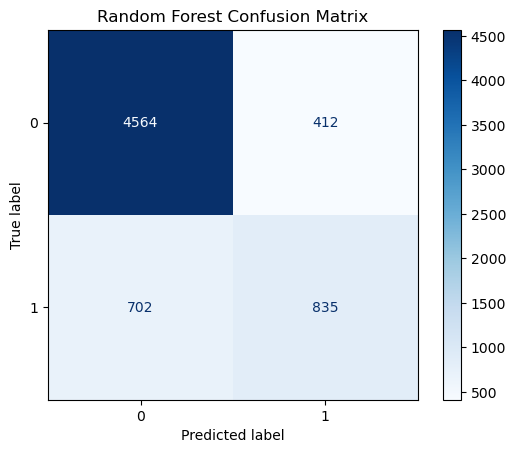

In [45]:
# Creating confusion matrix for the Random forest
cm_random_forest = confusion_matrix(y_test, random_forest_pred)
disp_random_forest = ConfusionMatrixDisplay(confusion_matrix=cm_random_forest)
disp_random_forest.plot(cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.show()

**The confusion matrix for the random forest model shows the model correctly predicted (true negative) 4564 individuals earning less than 50,000 annually, incorrectly predicted (false positive) 412 individuals earning more than 50,000 annually when they actually earn less, incorrectly predicted (false negative) 702 individuals earning less than 50,000 annually when they earn more, and correctly predicted (true positive) 835 individuals earning more than 50,000 annually.**

In [46]:
# Support Vector Machine
svm_model = SVC(random_state=42)

**Instance of the support vector machine algorithm was created and assigned to a variable where the parameter is set to 42 to ensure reproducibility of the result.**

In [47]:
# Training the model
svm_model.fit(X_train, y_train)

SVC(random_state=42)

**The support vector model is being trained on the training data where the fit method takes in the feature matrix and target vector for the training data.**

In [48]:
# Model prediction
svm_pred = svm_model.predict(X_test)

**The predict method is being used to make predictions on the test data where the predict method takes in the feature matrix and outputs the predicted labels, and then the predictions are stored in a variable.**

In [49]:
# Evaluating the model performance with the accuracy score function
svm_accuracy = accuracy_score(y_test, svm_pred)

svm_accuracy

0.8036235221863964

**The accuracy_score function is being used to evaluate the support vector machine model. The accuracy_score method calculates the accuracy of the model's prediction which takes in the true label for the test data and the predicted labels where the accuracy score of 80.36% is the proportion of the correct predictions out of the total number of predictions.**

In [50]:
# Evaluating the model performance with the classification report function
svm_report = classification_report(y_test, svm_pred)

svm_report

'              precision    recall  f1-score   support\n\n           0       0.80      0.98      0.88      4976\n           1       0.81      0.22      0.35      1537\n\n    accuracy                           0.80      6513\n   macro avg       0.81      0.60      0.62      6513\nweighted avg       0.80      0.80      0.76      6513\n'

**The classification_report function is being used to evaluate the support vector machine model. The classification_report generates a detailed report of the model where the function takes in the true label for the test data and the predicted labels then the metrics scores are obtained.**

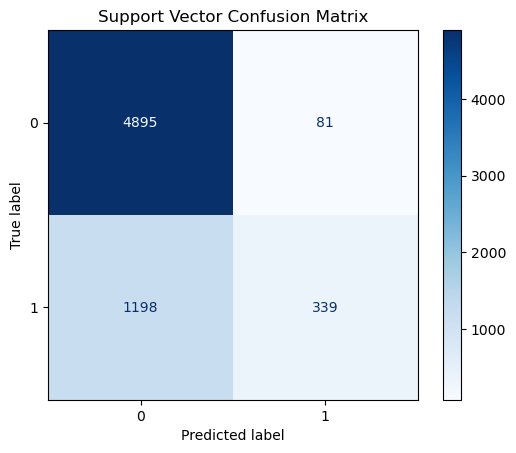

In [51]:
# Creating a confusion matrix for the support vector model
cm_support_vector = confusion_matrix(y_test, svm_pred)
disp_support_vector = ConfusionMatrixDisplay(confusion_matrix=cm_support_vector)
disp_support_vector.plot(cmap=plt.cm.Blues)
plt.title('Support Vector Confusion Matrix')
plt.show()

**The confusion matrix for the support vector model shows the model correctly predicted (true negative) 4895 individuals earning less than 50,000 annually, incorrectly predicted (false positive) 81 individuals earning more than 50,000 annually when they actually earn less, incorrectly predicted (false negative) 1198 individuals earning less than 50,000 annually when they earn more, and correctly predicted (true positive) 339 individuals earning more than 50,000 annually.**

In [52]:
# Defining the model
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

**An instance of the gradient boosting classifier algorithm was created and assigned to a variable where the parameter is set to 42 to ensure reproducibility of the result.**

In [53]:
# Fitting the model
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

**The gradient boosting model is being trained on the training data where the fit method takes in the feature matrix and target vector for the training data.**

In [54]:
# Making prediction
gradient_boosting_pred = gradient_boosting_model.predict(X_test)

**The predict method is being used to make predictions on the test data where the predict method takes in the feature matrix and outputs the predicted labels, and then the predictions are stored in a variable.**

In [55]:
# Model accuracy score
gradient_boosting_accuracy = accuracy_score(y_test, gradient_boosting_pred)
gradient_boosting_accuracy

0.8549055734684478

**The accuracy_score function is being used to evaluate the gradient boosting classifier model. The accuracy_score method calculates the accuracy of the model's prediction which takes in the true label for the test data and the predicted labels where the accuracy score of 85.49% is the proportion of the correct predictions out of the total number of predictions.**

In [56]:
# Model classification report
gradient_boosting_report = classification_report(y_test, gradient_boosting_pred)
gradient_boosting_report

'              precision    recall  f1-score   support\n\n           0       0.86      0.96      0.91      4976\n           1       0.80      0.51      0.62      1537\n\n    accuracy                           0.85      6513\n   macro avg       0.83      0.74      0.77      6513\nweighted avg       0.85      0.85      0.84      6513\n'

**The classification_report function is being used to evaluate the gradient boosting classifier model. The classification_report generates a detailed report of the model where the function takes in the true label for the test data and the predicted labels then the metrics scores are obtained.**

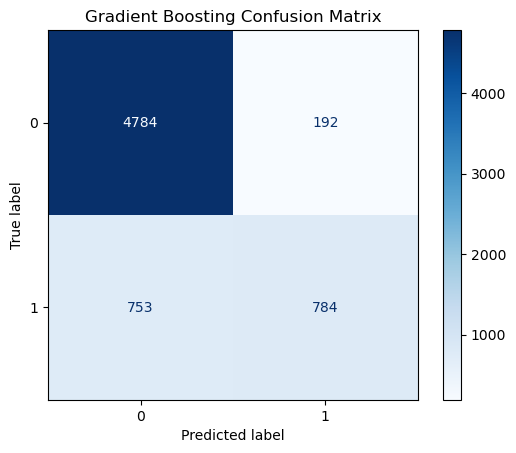

In [57]:
# Creating confusion matrix for the Random forest
cm_gradient_boosting = confusion_matrix(y_test, gradient_boosting_pred)
disp_gradient_boosting = ConfusionMatrixDisplay(confusion_matrix=cm_gradient_boosting)
disp_gradient_boosting.plot(cmap=plt.cm.Blues)
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

**The confusion matrix for the gradient boosting  model shows the model correctly predicted (true negative) 4784 individuals earning less than 50,000 annually, incorrectly predicted (false positive) 192 individuals earning more than 50,000 annually when they actually earn less, incorrectly predicted (false negative) 753 individuals earning less than 50,000 annually when they earn more, and correctly predicted (true positive) 784 individuals earning more than 50,000 annually.**

### Summary of Classification
**The summary of all the model accuracy shows that the gradient boosting classifier is with the highest model accuracy with 85.49% accuracy which will be the best for the model classification.**

## 4. Clustering

In [58]:
# Encode categorical variables
label_encoders = {}
for column in df_copy.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df_copy[column] = label_encoders[column].fit_transform(df_copy[column])

**Applying label encoder to the categorical columns in the dataset to encode the categorical values of the dataset.**

In [59]:
# Scaling the numerical columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_copy)

**The numerical values of the dataset are being scaled using the standard scaler function.**

C:\Users\USER\anaconda3\anacon\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\anacon\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\anacon\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\anacon\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\anacon\L

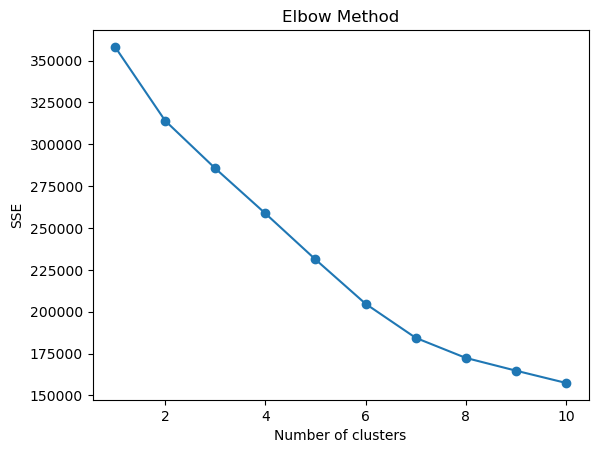

In [60]:
# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

**The elbow point method is being used in this graph which visually identify the optimal number of clusters by balancing between having high SSE and overfitting is showing 5 clusters making it the optimal number of clusters for this dataset.**

In [61]:
# Apply K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Add cluster labels to the original data
df_copy['Cluster'] = clusters

C:\Users\USER\anaconda3\anacon\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**K-mean is being used to get the clustering of the scaled dataset with the chosen optimal number from the elbow point.**

In [62]:
# Displaying the number of samples in each of the cluster
print(df_copy['Cluster'].value_counts())

Cluster
1    14635
3     9453
0     6836
2     1478
4      159
Name: count, dtype: int64


**The value count of all the clusters in the dataset from the k-mean clusters are being gotten.**

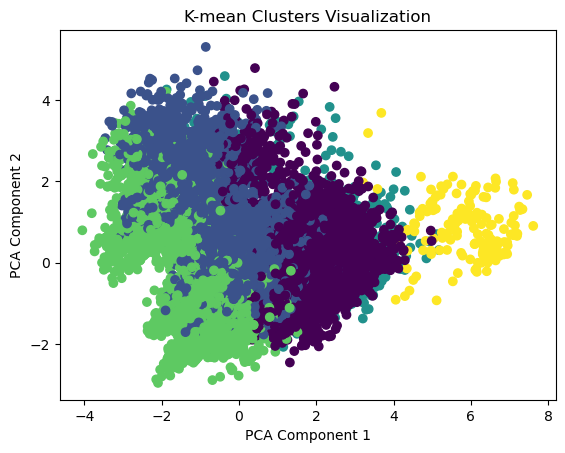

In [63]:
from sklearn.decomposition import PCA

# Visualizing the clusters for the first two principal components

# Getting the first two components
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_copy['PCA1'] = df_pca[:, 0]
df_copy['PCA2'] = df_pca[:, 1]

# Scatter plot of the clusters
plt.scatter(df_copy['PCA1'], df_copy['PCA2'], c=df_copy['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-mean Clusters Visualization')
plt.show()

**PCA function is being used to get the first 2 principal components of the dataset then the clusters are visualized with a scatter plot showing the K-mean clustering visualization that helps to see how the data are grouped into different clusters after applying PCA for dimensionality reduction. Overlapping regions colors suggest that clusters are not entirely distinct and have some overlap. This shows how the data points are grouped into different clusters with the colors.**

In [64]:
from sklearn.mixture import GaussianMixture

# Apply Gaussian Mixture Model for clustering
gmm = GaussianMixture(n_components=5, random_state=42)  
clusters = gmm.fit_predict(df_scaled)

**Guassian mixture model is being applied on the scaled dataset for clustering**

In [65]:
# Add cluster labels to the original data
df_copy['Cluster'] = clusters

# Display the number of samples in each cluster
print(df_copy['Cluster'].value_counts())

Cluster
1    13963
2     8976
3     6466
0     1637
4     1519
Name: count, dtype: int64


**The clusters label is being added to the dataset then the value counts of the clusters are gotten**

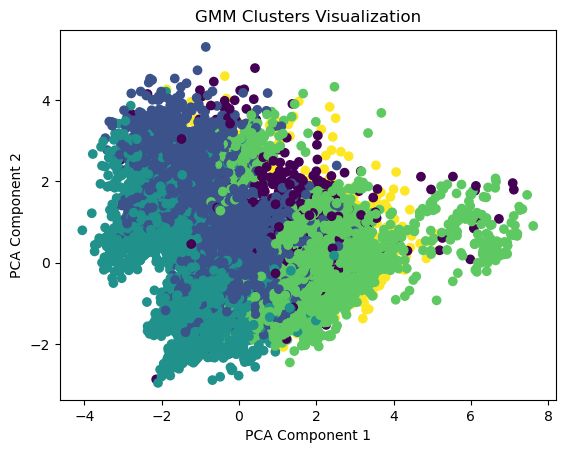

In [66]:
# Getting 2 components for dimensional reduction
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_copy['PCA1'] = df_pca[:, 0]
df_copy['PCA2'] = df_pca[:, 1]

# Scatter plot of GMM cluster
plt.scatter(df_copy['PCA1'], df_copy['PCA2'], c=df_copy['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('GMM Clusters Visualization')
plt.show()

**PCA function is being used to get the first 2 principal components of the dataset then the clusters are visualized with a scatter plot showing the GMM clustering visualization that helps to see how the data are grouped into different clusters after applying PCA for dimensionality reduction. Overlapping regions colors suggest that clusters are not entirely distinct and have some overlap. This shows how the data points are grouped into different clusters with the colors.**

### Clustering Summary

**The K-Means clustering result displays distinct clusters with well-defined boundaries, but it assumes that the clusters are spherical and uniformly sized. In contrast, the GMM clustering result displays clusters with greater flexibility in terms of size and shape, and in certain cases, it more accurately reflects the underlying data distribution. For these reasons, the GMM is the best clustering method for this dataset.**

## 5. Neural Networks

In [67]:
# Convert labels to categorical format
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

**The y_train and y_test sets are being converted into categorical format.**

In [68]:
# Building the feedforward neural network
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))  # 2 classes for binary classification

C:\Users\USER\anaconda3\anacon\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**The neural network model is being build.**

In [69]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**The neural network model is being comlied.**

In [70]:
# Training the model
model.fit(X_train, y_train_categorical, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7137 - loss: 1.3510
Epoch 2/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8172 - loss: 0.4044
Epoch 3/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8193 - loss: 0.4036
Epoch 4/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8208 - loss: 0.4007
Epoch 5/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8225 - loss: 0.3926
Epoch 6/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8228 - loss: 0.3920
Epoch 7/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8236 - loss: 0.3919
Epoch 8/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8237 - loss: 0.3854
Epoch 9/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8271 - loss: 0.3836
Epoch 10/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8288 - loss: 0.3746
Epoch 11/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8250 - loss: 0.3825
Epoch 12/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

**The neural network model is being trained in 20 epoch.**

In [71]:
# Predict on the test set
y_pred_proba = model.predict(X_test)
y_pred = y_pred_proba.argmax(axis=1)

204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


**The model is being used to predict on the testing data.**

In [72]:
# Calculate accuracy
nn_accuracy = accuracy_score(y_test, y_pred)

nn_accuracy

0.8277291570704745

**The accuracy of the model was gotten and it shows 82.77% prediction accuracy which is a good accuracy.**

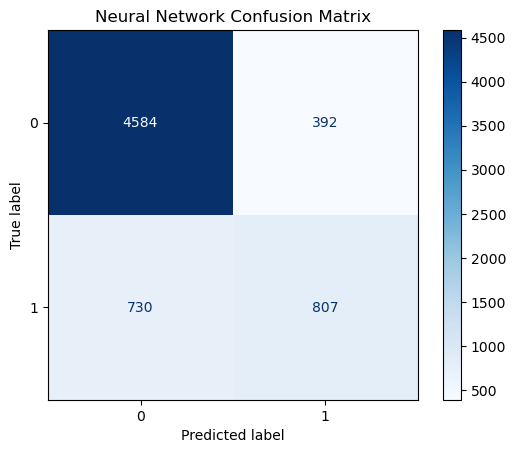

In [73]:
# Create confusion matrix for Logistic Regression
cm_neural = confusion_matrix(y_test, y_pred)
disp_neural = ConfusionMatrixDisplay(confusion_matrix=cm_neural)
disp_neural.plot(cmap=plt.cm.Blues)
plt.title('Neural Network Confusion Matrix')
plt.show()

**The confusion matrix for the neural network shows the model correctly predicted (true negative) 4757 individuals earning less than 50,000 annually, incorrectly predicted (false positive) 219 individuals earning more than 50,000 annually when they actually earn less, incorrectly predicted (false negative) 864 individuals earning less than 50,000 annually when they earn more, and correctly predicted (true positive) 673 individuals earning more than 50,000 annually.**

### Summary of Neural Work

**The neural network with the 82% accuracy is a good model to work with having a good accuracy of prediction.**

## 6. Optimization

In [74]:
# Define the parameter grid
param_grid_logistic = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear']
}

**Defining the parameter grid to perform hyperparameter tuning using Grid Search technique which evaluate the performance of the model with the combination of the specified hyperparameters to find the best set that optimizes the model performance.**

In [75]:
# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

**The logistic regression algorithm is being defined.**

In [76]:
# Perform Grid Search
grid_search_logistic = GridSearchCV(logistic_model, param_grid_logistic, cv=5, scoring='accuracy')
grid_search_logistic.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.1, 1.0, 10.0], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy')

**A grid search to find the best hyperparameters for the logistic regression model using 5 fold  cross validation and accuracy as the scoring metric is being performed where this will ensure that the selected model parameters are the best in terms of predictive accuracy**

In [77]:
# Best parameters and best score
best_params_logistic = grid_search_logistic.best_params_
best_score_logistic = grid_search_logistic.best_score_

**The best hyperparameters found during the grid search and the best accuracy score achieved are being gotten**

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Use the best parameters from GridSearchCV
logistic_model_optimized = LogisticRegression(**best_params_logistic, random_state=42)
logistic_model_optimized.fit(X_train, y_train)
logistic_pred_optimized = logistic_model_optimized.predict(X_test)


**The logistic regression model is being initialized with the best hyperparameters found during the grid search which is being trained on the training dataset and then the trained model is used to predict labels on the test dataset**

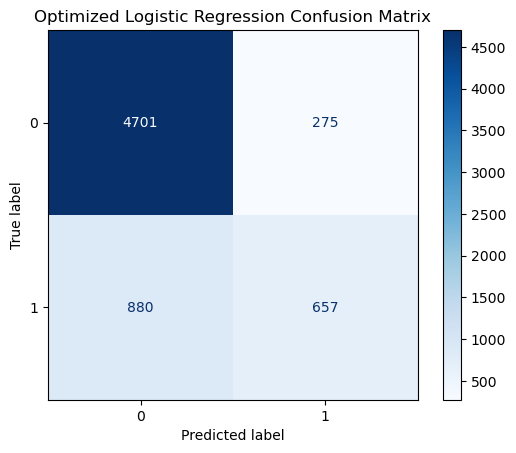

In [79]:
# Confusion Matrix for logistic regression
cm_logistic_optimized = confusion_matrix(y_test, logistic_pred_optimized)
disp_logistic_optimized = ConfusionMatrixDisplay(confusion_matrix=cm_logistic_optimized)
disp_logistic_optimized.plot(cmap=plt.cm.Blues)
plt.title('Optimized Logistic Regression Confusion Matrix')
plt.show()


**The confusion matrix for the optimized logistic regression model shows the model correctly predicted (true negative) 4701 individuals earning less than 50,000 annually, incorrectly predicted (false positive) 275 individuals earning more than 50,000 annually when they actually earn less, incorrectly predicted (false negative) 880 individuals earning less than 50,000 annually when they earn more, and correctly predicted (true positive) 657 individuals earning more than 50,000 annually.**

In [80]:
# Define the parameter grid
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20]
}

**Defining the parameter grid to perform hyperparameter tuning using Grid Search technique which evaluate the performance of the model with the combination of the specified hyperparameters to find the best set that optimizes the model performance.**

In [81]:
# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

**The decision tree algorithm is being defined.**

In [82]:
# Perform Grid Search
grid_search_tree = GridSearchCV(decision_tree_model, param_grid_tree, cv=5, scoring='accuracy')
grid_search_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 10, 20]},
             scoring='accuracy')

**A grid search to find the best hyperparameters for the decision tree model using 5 fold  cross validation and accuracy as the scoring metric is being performed where this will ensure that the selected model parameters are the best in terms of predictive accuracy**

In [83]:
# Best parameters and best score
best_params_tree = grid_search_tree.best_params_
best_score_tree = grid_search_tree.best_score_

**The best hyperparameters found during the grid search and the best accuracy score achieved are being gotten**

In [84]:
# Use the best parameters from GridSearchCV
decision_tree_model_optimized = DecisionTreeClassifier(**best_params_tree, random_state=42)
decision_tree_model_optimized.fit(X_train, y_train)
decision_tree_pred_optimized = decision_tree_model_optimized.predict(X_test)


**The decision tree model is being initialized with the best hyperparameters found during the grid search which is being trained on the training dataset and then the trained model is used to predict labels on the test dataset**

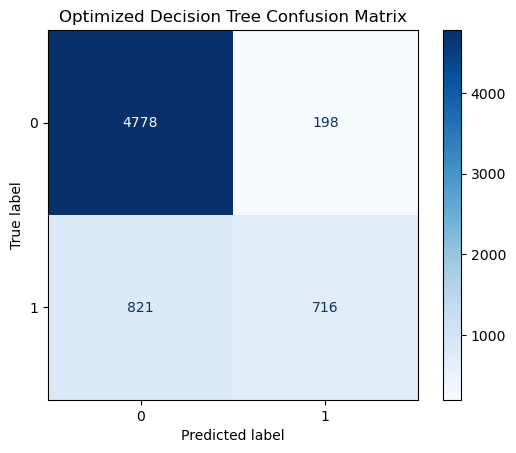

In [85]:
# Confusion Matrix
cm_tree_optimized = confusion_matrix(y_test, decision_tree_pred_optimized)
disp_tree_optimized = ConfusionMatrixDisplay(confusion_matrix=cm_tree_optimized)
disp_tree_optimized.plot(cmap=plt.cm.Blues)
plt.title('Optimized Decision Tree Confusion Matrix')
plt.show()

**The confusion matrix for the optimized decision tree model shows the model correctly predicted (true negative) 4778 individuals earning less than 50,000 annually, incorrectly predicted (false positive) 198 individuals earning more than 50,000 annually when they actually earn less, incorrectly predicted (false negative) 821 individuals earning less than 50,000 annually when they earn more, and correctly predicted (true positive) 716 individuals earning more than 50,000 annually.**

In [86]:
# Define the parameter grid
param_grid_forest = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 10]
}

**Defining the parameter grid to perform hyperparameter tuning using Grid Search technique which evaluate the performance of the model with the combination of the specified hyperparameters to find the best set that optimizes the model performance.**

In [87]:
# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

**The random forest model algorithm is being defined.**

In [88]:
# Perform Grid Search
grid_search_forest = GridSearchCV(random_forest_model, param_grid_forest, cv=5, scoring='accuracy')
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10], 'max_features': ['sqrt'],
                         'min_samples_split': [2, 10],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

**A grid search to find the best hyperparameters for the random forest model using 5 fold  cross validation and accuracy as the scoring metric is being performed where this will ensure that the selected model parameters are the best in terms of predictive accuracy**

In [89]:
# Best parameters and best score
best_params_forest = grid_search_forest.best_params_
best_score_forest = grid_search_forest.best_score_

**The best hyperparameters found during the grid search and the best accuracy score achieved are being gotten**

In [90]:
# Use the best parameters from GridSearchCV
random_forest_model_optimized = RandomForestClassifier(**best_params_forest, random_state=42)
random_forest_model_optimized.fit(X_train, y_train)
random_forest_pred_optimized = random_forest_model_optimized.predict(X_test)


**The random forest model is being initialized with the best hyperparameters found during the grid search which is being trained on the training dataset and then the trained model is used to predict labels on the test dataset**

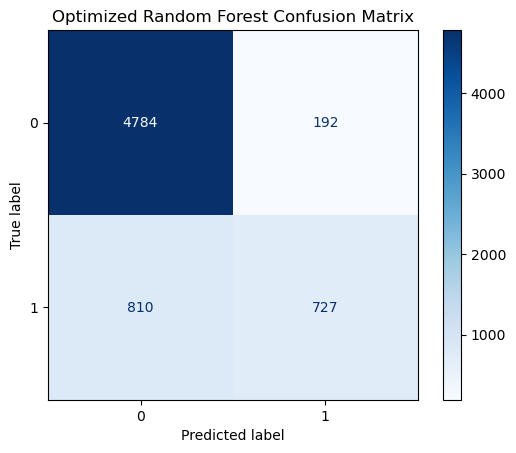

In [91]:
# Confusion Matrix
cm_forest_optimized = confusion_matrix(y_test, random_forest_pred_optimized)
disp_forest_optimized = ConfusionMatrixDisplay(confusion_matrix=cm_forest_optimized)
disp_forest_optimized.plot(cmap=plt.cm.Blues)
plt.title('Optimized Random Forest Confusion Matrix')
plt.show()

**The confusion matrix for the optimized random forest model shows the model correctly predicted (true negative) 4784 individuals earning less than 50,000 annually, incorrectly predicted (false positive) 192 individuals earning more than 50,000 annually when they actually earn less, incorrectly predicted (false negative) 810 individuals earning less than 50,000 annually when they earn more, and correctly predicted (true positive) 727 individuals earning more than 50,000 annually.**

In [97]:
# Define the parameter grid
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

**Defining the parameter grid to perform hyperparameter tuning using Grid Search technique which evaluate the performance of the model with the combination of the specified hyperparameters to find the best set that optimizes the model performance.**

In [98]:
# Initialize the Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

**The gradient boosting algorithm is being defined.**

In [99]:
# Perform Grid Search
grid_search_gb = GridSearchCV(gradient_boosting_model, param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

**A grid search to find the best hyperparameters for the gradient boosting model using 5 fold  cross validation and accuracy as the scoring metric is being performed where this will ensure that the selected model parameters are the best in terms of predictive accuracy**

In [100]:
# Best parameters and best score
best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

**The best hyperparameters found during the grid search and the best accuracy score achieved are being gotten**

In [101]:
# Use the best parameters from GridSearchCV
gradient_boosting_model_optimized = GradientBoostingClassifier(**best_params_gb, random_state=42)
gradient_boosting_model_optimized.fit(X_train, y_train)
gradient_boosting_pred_optimized = gradient_boosting_model_optimized.predict(X_test)


**The gradient boosting model is being initialized with the best hyperparameters found during the grid search which is being trained on the training dataset and then the trained model is used to predict labels on the test dataset**

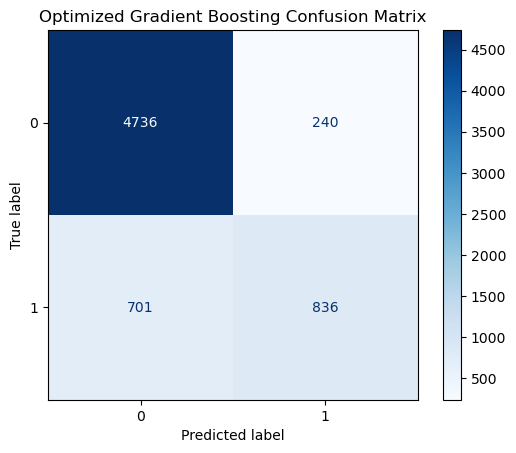

In [102]:
# Confusion Matrix for gradient boosting
cm_gb_optimized = confusion_matrix(y_test, gradient_boosting_pred_optimized)
disp_gb_optimized = ConfusionMatrixDisplay(confusion_matrix=cm_gb_optimized)
disp_gb_optimized.plot(cmap=plt.cm.Blues)
plt.title('Optimized Gradient Boosting Confusion Matrix')
plt.show()

****The confusion matrix for the optimized gradient boosting model shows the model correctly predicted (true negative) 4736 individuals earning less than 50,000 annually, incorrectly predicted (false positive) 240 individuals earning more than 50,000 annually when they actually earn less, incorrectly predicted (false negative) 701 individuals earning less than 50,000 annually when they earn more, and correctly predicted (true positive) 836 individuals earning more than 50,000 annually.****

### Summary of optimization

**After performing the optimization on the model making it to choose the best hyperparameter and best accuracy to get the best accuracy works on all the models as it increase all the accuracy of the model with gradient boosting having the best accuracy with the confusion matrix visualization.**